In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np

## Choosing the Columns to Focus on
- I'll be choosing the following columns as predictors: `Make`, `Longitude`, `Latitude`, and `WeatherCondition`
- I'll be choosing the following column to predict: `AircraftDamage`

In [46]:
df = pd.read_csv("Merged10yrdata.csv", low_memory=False)
df.columns = df.columns.str.strip()  

df = df[df['Country'] == 'United States']

df = df[['Make', 'Longitude', 'Latitude', 'WeatherCondition', 'AirCraftDamage']]

df = df[df['Make'].isin([
    'BOEING', 'Airbus', 'Boeing', 'AIRBUS', 
    'AIRBUS INDUSTRIE', 'BOEING, AIRBUS', 'AIRBUS SAS'
])]
df


,Make,Longitude,Latitude,WeatherCondition,AirCraftDamage
129,BOEING,-153.843048,22.608888,IMC,NaN
218,BOEING,-78.502502,41.412498,VMC,Substantial
223,AIRBUS,-150.870834,61.228610,VMC,Substantial
333,BOEING,-117.383056,34.597499,VMC,Minor
429,AIRBUS,-114.125550,46.251667,VMC,Substantial
...,...,...,...,...,...
16256,BOEING,NaN,NaN,NaN,NaN
16265,BOEING,NaN,NaN,NaN,NaN
16266,BOEING,NaN,NaN,NaN,NaN
16362,BOEING,NaN,NaN,NaN,NaN


## Data Prepping, Cleaning, and Filtering

In [51]:
# Since we can't impute on any of these columns, we shall remove those rows
df = df.dropna()

In [53]:
df['AirCraftDamage'].unique()

array(['Substantial', 'Minor', 'Destroyed', 'Minor, Substantial',
       'Substantial, Substantial', 'None, None', 'Unknown'], dtype=object)

In [64]:
print(df['AirCraftDamage'].value_counts())

AirCraftDamage
Substantial                 125
Minor                        18
Destroyed                     5
Minor, Substantial            1
Substantial, Substantial      1
Name: count, dtype: int64


In [65]:
df = df[df["AirCraftDamage"].isin(
    ['Substantial', 'Minor', 'Destroyed']
)] # Removing unknown and nones

df = df[df["WeatherCondition"].isin(['VMC', 'IMC'])] # Removing Unknown and None

df

,Make,Longitude,Latitude,WeatherCondition,AirCraftDamage
218,BOEING,-78.502502,41.412498,VMC,Substantial
223,AIRBUS,-150.870834,61.228610,VMC,Substantial
333,BOEING,-117.383056,34.597499,VMC,Minor
429,AIRBUS,-114.125550,46.251667,VMC,Substantial
434,AIRBUS,-90.259162,29.993333,VMC,Minor
...,...,...,...,...,...
15920,BOEING,-97.243592,33.370991,VMC,Substantial
16003,BOEING,-97.199097,33.201961,VMC,Substantial
16004,BOEING,-76.718454,37.239960,VMC,Substantial
16111,BOEING,-82.410832,38.434006,VMC,Substantial


## ML Analysis - Decision Tree
Now that the data has been cleaned, we run an analysis

In [66]:
from sklearn import tree
from sklearn.model_selection import train_test_split

my_tree = tree.DecisionTreeClassifier()

X = df[['Make', 'Longitude', 'Latitude', 'WeatherCondition']]
y = df['AirCraftDamage']

X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

my_tree.fit(X_train, y_train)

DecisionTreeClassifier()

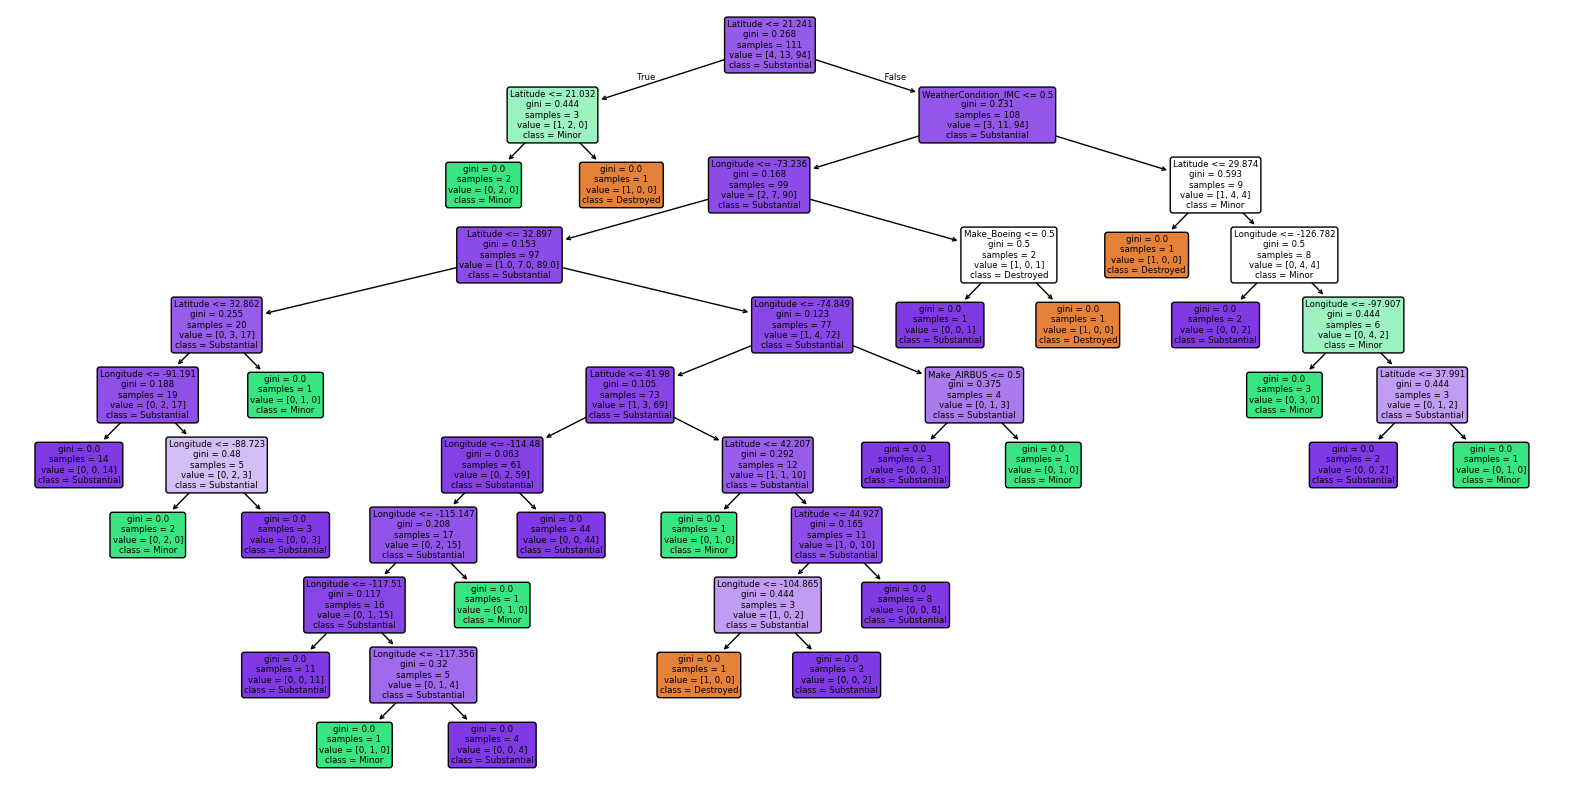

In [68]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(
    my_tree,
    feature_names=X.columns,           
    class_names=my_tree.classes_,      
    filled=True,                       
    rounded=True                       
)

plt.show()
